# AJAY HSE 2023 SPRING PROGRAMMING ASSIGNMENT

In [121]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import nltk
import ydata_profiling
from markupsafe import escape
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split, cross_val_score
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

# model building imports
from keras.layers import Embedding, Flatten, Dense, Dropout
from keras.layers import Conv1D, SimpleRNN, Bidirectional, MaxPooling1D, GlobalMaxPool1D, LSTM, GRU
from keras.models import Sequential
from keras.regularizers import L1L2

%matplotlib inline

# matplotlib defaults
plt.style.use("ggplot")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

import warnings 
warnings.filterwarnings('ignore')
nltk.download('omw-1.4')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

[nltk_data] Downloading package omw-1.4 to C:\Users\Kishan
[nltk_data]     Bhimani\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Text data visualization

In [123]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.read_json("News_Category_Dataset_v3.json", lines = True)
df.head(5)

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [124]:
sports_df = df[df['category'] == 'SPORTS']
print(sports_df.shape)
sports_df.head(5)

(5077, 6)


,link,headline,category,short_description,authors,date
17,https://www.huffpost.com/entry/dodgers-basebal...,"Maury Wills, Base-Stealing Shortstop For Dodge...",SPORTS,"Maury Wills, who helped the Los Angeles Dodger...","Beth Harris, AP",2022-09-20
26,https://www.huffpost.com/entry/2022-wnba-final...,"Las Vegas Aces Win First WNBA Title, Chelsea G...",SPORTS,Las Vegas never had a professional sports cham...,"Pat Eaton-Robb, AP",2022-09-19
61,https://www.huffpost.com/entry/boston-marathon...,Boston Marathon To Make Race More Inclusive Fo...,SPORTS,The race's organizers say nonbinary athletes w...,Sanjana Karanth,2022-09-12
62,https://www.huffpost.com/entry/anthony-varvaro...,"Anthony Varvaro, MLB Pitcher Turned Transit Co...",SPORTS,Varvaro pitched mostly with the Atlanta Braves...,,2022-09-12
67,https://www.huffpost.com/entry/carlos-alcaraz-...,Carlos Alcaraz Wins U.S. Open For 1st Slam Tit...,SPORTS,Carlos Alcaraz defeated Casper Ruud in the U.S...,"HOWARD FENDRICH, AP",2022-09-11


In [125]:
business_df = df[df['category'] == 'BUSINESS']
print(business_df.shape)
business_df.head(5)

(5992, 6)


,link,headline,category,short_description,authors,date
162,https://www.huffpost.com/entry/rei-workers-ber...,REI Workers At Berkeley Store Vote To Unionize...,BUSINESS,They follow in the footsteps of REI workers in...,Dave Jamieson,2022-08-25
353,https://www.huffpost.com/entry/twitter-elon-mu...,Twitter Lawyer Calls Elon Musk 'Committed Enem...,BUSINESS,Delaware Chancery Judge Kathaleen McCormick de...,Marita Vlachou,2022-07-20
632,https://www.huffpost.com/entry/starbucks-leave...,"Starbucks Leaving Russian Market, Shutting 130...",BUSINESS,Starbucks' move follows McDonald's exit from t...,"DEE-ANN DURBIN, AP",2022-05-23
690,https://www.huffpost.com/entry/coinbase-crypto...,Crypto Crash Leaves Trading Platform Coinbase ...,BUSINESS,Cryptocurrency trading platform Coinbase has l...,"Matt Ott, AP",2022-05-12
727,https://www.huffpost.com/entry/us-april-jobs-r...,"US Added 428,000 Jobs In April Despite Surging...",BUSINESS,"At 3.6%, unemployment nearly reached the lowes...","Paul Wiseman, AP",2022-05-06


In [126]:
politics_df = df[df['category'] == 'POLITICS']
print(politics_df.shape)
politics_df.head(5)

(35602, 6)


,link,headline,category,short_description,authors,date
21,https://www.huffpost.com/entry/biden-us-forces...,Biden Says U.S. Forces Would Defend Taiwan If ...,POLITICS,President issues vow as tensions with China rise.,,2022-09-19
24,https://www.huffpost.com/entry/ukraine-festiva...,‘Beautiful And Sad At The Same Time’: Ukrainia...,POLITICS,An annual celebration took on a different feel...,Jonathan Nicholson,2022-09-19
30,https://www.huffpost.com/entry/europe-britain-...,Biden Says Queen's Death Left 'Giant Hole' For...,POLITICS,"U.S. President Joe Biden, in London for the fu...","Darlene Superville, AP",2022-09-18
40,https://www.huffpost.com/entry/afghan-adjustme...,Bill To Help Afghans Who Escaped Taliban Faces...,POLITICS,Republican outrage over the shoddy U.S. withdr...,Hamed Ahmadi and Arthur Delaney,2022-09-16
44,https://www.huffpost.com/entry/capitol-riot-in...,Mark Meadows Complies With Justice Dept. Subpo...,POLITICS,The former White House chief of staff has turn...,"ERIC TUCKER, AP",2022-09-15


Key findings:

- Dataset has total 41 distinct categories of news articles
- 'Politics' is the most common category of news in our dataset.
- We have total of 27993 unique authors who have written various news articles
- Maximum length of headline is 320 while median length is around 59.
- Maximum length of description is 1472 while median length is around 120.

# TOP 10 Categories of News Articles

In [127]:
cates = df.groupby('category')
print("total categories:", cates.ngroups)
print(cates.size())

total categories: 42
category
ARTS               1509
ARTS & CULTURE     1339
BLACK VOICES       4583
BUSINESS           5992
COLLEGE            1144
COMEDY             5400
CRIME              3562
CULTURE & ARTS     1074
DIVORCE            3426
EDUCATION          1014
ENTERTAINMENT     17362
ENVIRONMENT        1444
FIFTY              1401
FOOD & DRINK       6340
GOOD NEWS          1398
GREEN              2622
HEALTHY LIVING     6694
HOME & LIVING      4320
IMPACT             3484
LATINO VOICES      1130
MEDIA              2944
MONEY              1756
PARENTING          8791
PARENTS            3955
POLITICS          35602
QUEER VOICES       6347
RELIGION           2577
SCIENCE            2206
SPORTS             5077
STYLE              2254
STYLE & BEAUTY     9814
TASTE              2096
TECH               2104
THE WORLDPOST      3664
TRAVEL             9900
U.S. NEWS          1377
WEDDINGS           3653
WEIRD NEWS         2777
WELLNESS          17945
WOMEN              3572
WORLD NEWS

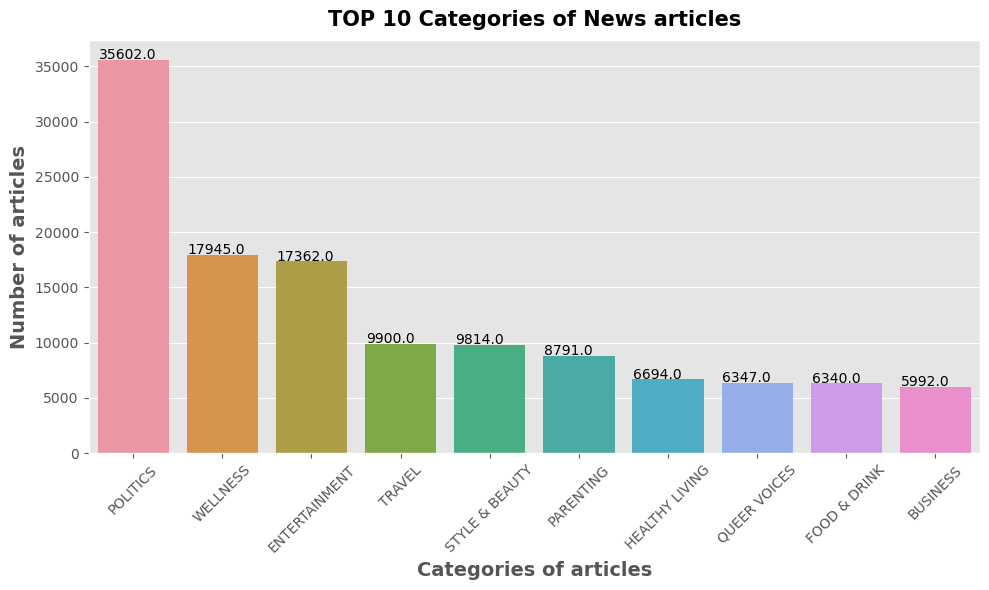

In [128]:
# Top categories by and number of articles per categories
cat_df = pd.DataFrame(df['category'].value_counts()).reset_index()
cat_df.rename(columns={'index':'news_classes','category':'numcat'}, inplace=True)

# Visualize top 10 categories and proportion of each categories in dataset
plt.figure(figsize=(10,6))
ax = sns.barplot(np.array(cat_df.news_classes)[:10], np.array(cat_df.numcat)[:10])
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.01, p.get_height() + 50))
plt.title("TOP 10 Categories of News articles", size=15)
plt.xlabel("Categories of articles", size=14)
plt.xticks(rotation=45)
plt.ylabel("Number of articles", size=14)
plt.show()

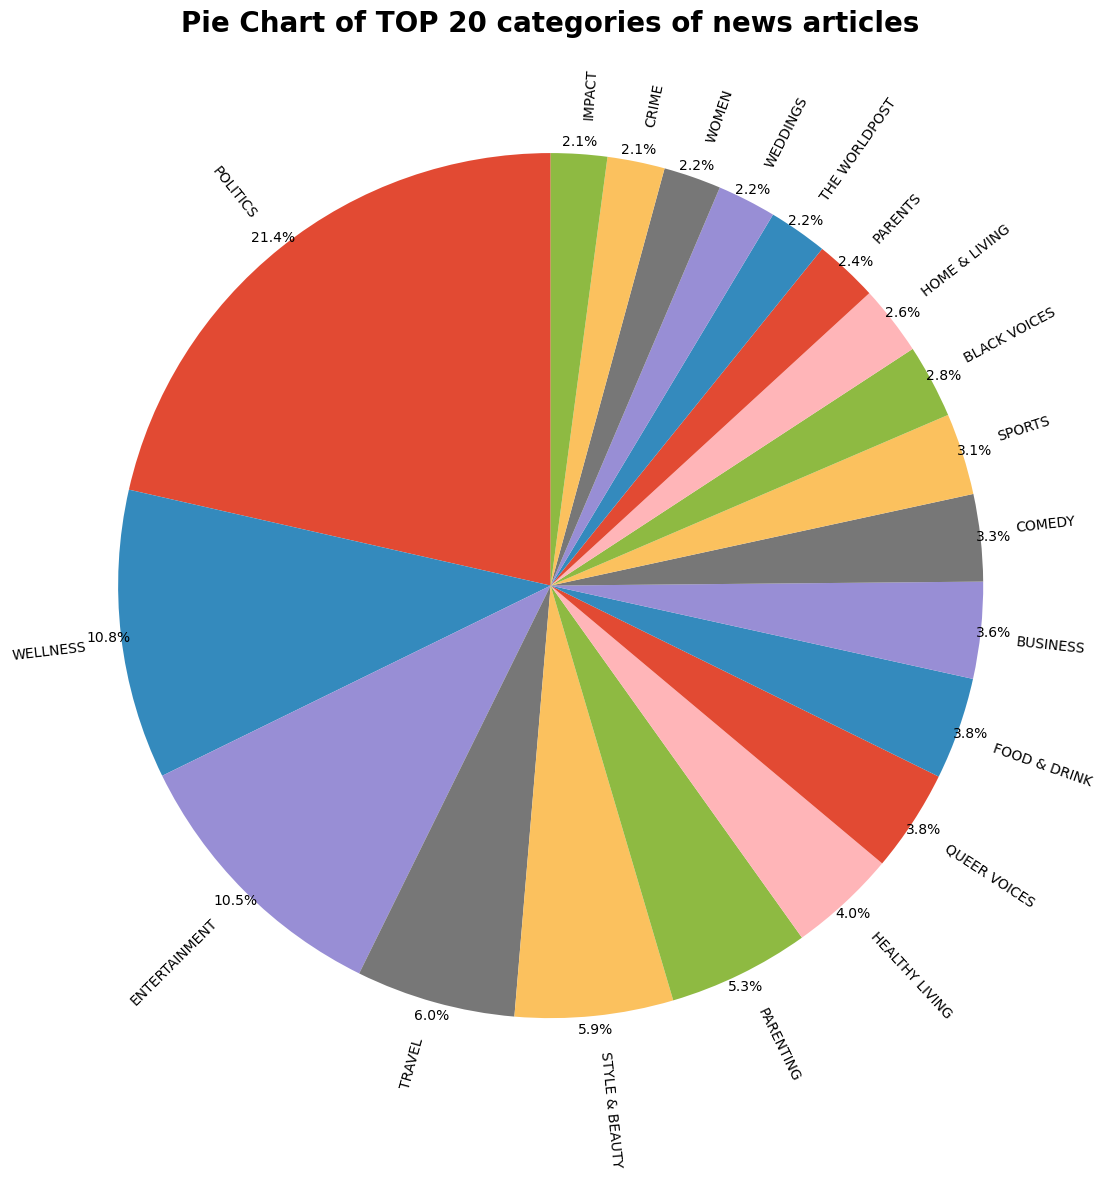

In [129]:
# plot the pie chart of top 20 categories of news articles
fig = plt.figure(figsize=(12,12))
A = plt.pie(cat_df['numcat'][:20],
            labels=cat_df['news_classes'][:20],
            autopct='%1.1f%%',
            startangle=90,
            labeldistance=1.08,
            pctdistance=1.03,
            rotatelabels=45
            )

plt.title("Pie Chart of TOP 20 categories of news articles", size=20, weight='bold')
plt.show()


 - <div class="alert alert-block alert-success">
<b>POLITICS:</b> From all the categories of news POLITICS has the most number of articles as well as length of characters in the article (headlines and short-description)
</div>

In [130]:
# using headlines and short_description as input X

df['text'] = df.headline + " " + df.short_description

# tokenizing

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df.text)
X = tokenizer.texts_to_sequences(df.text)
df['words'] = X

# delete some empty and short data

df['word_length'] = df.words.apply(lambda i: len(i))
article_df = df[df.word_length >= 5]

article_df.head()

,link,headline,category,short_description,authors,date,text,words,word_length
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,Over 4 Million Americans Roll Up Sleeves For O...,"[70, 315, 274, 270, 2178, 48, 11363, 8, 20059,...",42
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,"American Airlines Flyer Charged, Banned For Li...","[168, 1669, 11003, 1402, 3118, 8, 68, 57, 9596...",42
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,23 Of The Funniest Tweets About Cats And Dogs ...,"[1949, 4, 1, 1780, 752, 25, 2791, 5, 1180, 16,...",26
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,The Funniest Tweets From Parents This Week (Se...,"[1, 1780, 752, 22, 198, 16, 97, 4161, 1153, 19...",36
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,Woman Who Called Cops On Black Bird-Watcher Lo...,"[218, 46, 335, 1379, 10, 171, 2523, 25172, 291...",38


# Wordclouds of categories data

(-0.5, 1599.5, 599.5, -0.5)

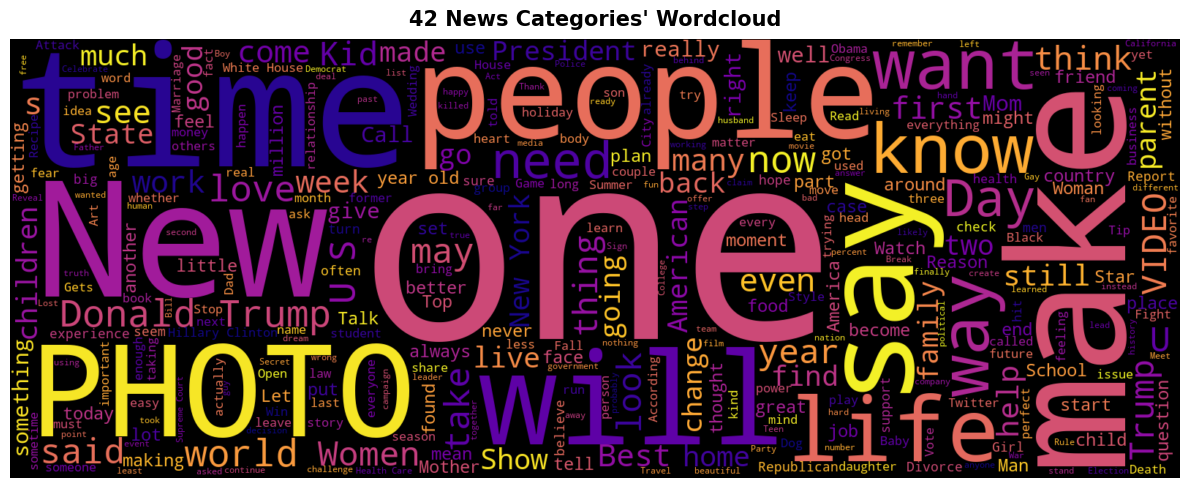

In [131]:
# wordcloud of categories of news articles in our dataset
plt.figure(figsize=(12,12))
wc = WordCloud(max_words=1000, 
               min_font_size=10,
               height=600,
               width=1600,
               background_color='black',
               contour_color='black',
               colormap='plasma',
               repeat=False,
               stopwords=STOPWORDS).generate(' '.join(df['text']))

plt.title("42 News Categories' Wordcloud", size=15, weight='bold')
plt.imshow(wc, interpolation= "bilinear")
plt.axis('off')

In [132]:
article_df.head()

,link,headline,category,short_description,authors,date,text,words,word_length
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,Over 4 Million Americans Roll Up Sleeves For O...,"[70, 315, 274, 270, 2178, 48, 11363, 8, 20059,...",42
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,"American Airlines Flyer Charged, Banned For Li...","[168, 1669, 11003, 1402, 3118, 8, 68, 57, 9596...",42
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,23 Of The Funniest Tweets About Cats And Dogs ...,"[1949, 4, 1, 1780, 752, 25, 2791, 5, 1180, 16,...",26
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,The Funniest Tweets From Parents This Week (Se...,"[1, 1780, 752, 22, 198, 16, 97, 4161, 1153, 19...",36
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,Woman Who Called Cops On Black Bird-Watcher Lo...,"[218, 46, 335, 1379, 10, 171, 2523, 25172, 291...",38


In [133]:
# Now only 3 categories which are Business, Politics and Sports 

sport_business_politics_df = article_df[(article_df['category'] == 'BUSINESS') | (article_df['category'] == 'POLITICS') | (article_df['category'] == 'SPORTS')]
print(sport_business_politics_df.shape)
sport_business_politics_df.head(5)

(46484, 9)


,link,headline,category,short_description,authors,date,text,words,word_length
17,https://www.huffpost.com/entry/dodgers-basebal...,"Maury Wills, Base-Stealing Shortstop For Dodge...",SPORTS,"Maury Wills, who helped the Los Angeles Dodger...","Beth Harris, AP",2022-09-20,"Maury Wills, Base-Stealing Shortstop For Dodge...","[28529, 30768, 2978, 4467, 28530, 8, 10035, 14...",30
21,https://www.huffpost.com/entry/biden-us-forces...,Biden Says U.S. Forces Would Defend Taiwan If ...,POLITICS,President issues vow as tensions with China rise.,,2022-09-19,Biden Says U.S. Forces Would Defend Taiwan If ...,"[981, 90, 100, 101, 1505, 88, 2792, 7389, 52, ...",19
24,https://www.huffpost.com/entry/ukraine-festiva...,‘Beautiful And Sad At The Same Time’: Ukrainia...,POLITICS,An annual celebration took on a different feel...,Jonathan Nicholson,2022-09-19,‘Beautiful And Sad At The Same Time’: Ukrainia...,"[42124, 5, 1706, 21, 1, 251, 30769, 6024, 2076...",32
26,https://www.huffpost.com/entry/2022-wnba-final...,"Las Vegas Aces Win First WNBA Title, Chelsea G...",SPORTS,Las Vegas never had a professional sports cham...,"Pat Eaton-Robb, AP",2022-09-19,"Las Vegas Aces Win First WNBA Title, Chelsea G...","[2171, 1728, 20839, 490, 76, 14485, 2028, 3906...",22
30,https://www.huffpost.com/entry/europe-britain-...,Biden Says Queen's Death Left 'Giant Hole' For...,POLITICS,"U.S. President Joe Biden, in London for the fu...","Darlene Superville, AP",2022-09-18,Biden Says Queen's Death Left 'Giant Hole' For...,"[981, 90, 9483, 256, 466, 37088, 23889, 8, 178...",42


# Model training & TRAIN, TEST, SPLIT DATA

In [134]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPooling1D, GlobalMaxPooling1D


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sport_business_politics_df['text'], sport_business_politics_df['category'], test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# LinearSVC

In [14]:
# Train a LinearSVC classifier
svm_clf = LinearSVC()
svm_clf.fit(X_train, y_train)
svm_y_pred = svm_clf.predict(X_test)

# Evaluate the classifiers
print("LinearSVC")
print("Accuracy:", accuracy_score(y_test, svm_y_pred))
print("Precision:", precision_score(y_test, svm_y_pred, average='weighted'))
print("Recall:", recall_score(y_test, svm_y_pred, average='weighted'))
print("F1 score:", f1_score(y_test, svm_y_pred, average='weighted'))
print("")

LinearSVC
Accuracy: 0.9265354415402818
Precision: 0.9247953153922127
Recall: 0.9265354415402818
F1 score: 0.9251028141222911



# MultinomialNB

In [15]:
# Train a MultinomialNB classifier
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)
nb_y_pred = nb_clf.predict(X_test)

print("MultinomialNB")
print("Accuracy:", accuracy_score(y_test, nb_y_pred))
print("Precision:", precision_score(y_test, nb_y_pred, average='weighted'))
print("Recall:", recall_score(y_test, nb_y_pred, average='weighted'))
print("F1 score:", f1_score(y_test, nb_y_pred, average='weighted'))
print("")

MultinomialNB
Accuracy: 0.8014413251586533
Precision: 0.8370593413062939
Recall: 0.8014413251586533
F1 score: 0.7418138439326697



# Random Forest

In [16]:
# Train a Random Forest classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_y_pred = rf_clf.predict(X_test)

print("Random Forest")
print("Accuracy:", accuracy_score(y_test, rf_y_pred))
print("Precision:", precision_score(y_test, rf_y_pred, average='weighted'))
print("Recall:", recall_score(y_test, rf_y_pred, average='weighted'))
print("F1 score:", f1_score(y_test, rf_y_pred, average='weighted'))
print("")

Random Forest
Accuracy: 0.8728622136172959
Precision: 0.8774000493522165
Recall: 0.8728622136172959
F1 score: 0.8570135880187579



# Stochastic Gradient Descent

In [17]:
# Train a Stochastic Gradient Descent classifier
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)
sgd_y_pred = sgd_clf.predict(X_test)

      
print("Stochastic Gradient Descent")
print("Accuracy:", accuracy_score(y_test, sgd_y_pred))
print("Precision:", precision_score(y_test, sgd_y_pred, average='weighted'))
print("Recall:", recall_score(y_test, sgd_y_pred, average='weighted'))
print("F1 score:", f1_score(y_test, sgd_y_pred, average='weighted'))
print("")

Stochastic Gradient Descent
Accuracy: 0.9104012046896849
Precision: 0.9106423330656175
Recall: 0.9104012046896849
F1 score: 0.9044783775550518



# Multi-Layer Perceptron (MLP)

In [19]:
# Train a Multi-Layer Perceptron (MLP) classifier
mlp_clf = MLPClassifier()
mlp_clf.fit(X_train, y_train)
mlp_y_pred = mlp_clf.predict(X_test)

print("Multi-Layer Perceptron (MLP)")
print("Accuracy:", accuracy_score(y_test, mlp_y_pred))
print("Precision:", precision_score(y_test, mlp_y_pred, average='weighted'))
print("Recall:", recall_score(y_test, mlp_y_pred, average='weighted'))
print("F1 score:", f1_score(y_test, mlp_y_pred, average='weighted'))
print("")  

Multi-Layer Perceptron (MLP)
Accuracy: 0.9124448746907604
Precision: 0.9105998830893011
Recall: 0.9124448746907604
F1 score: 0.9111968765304646



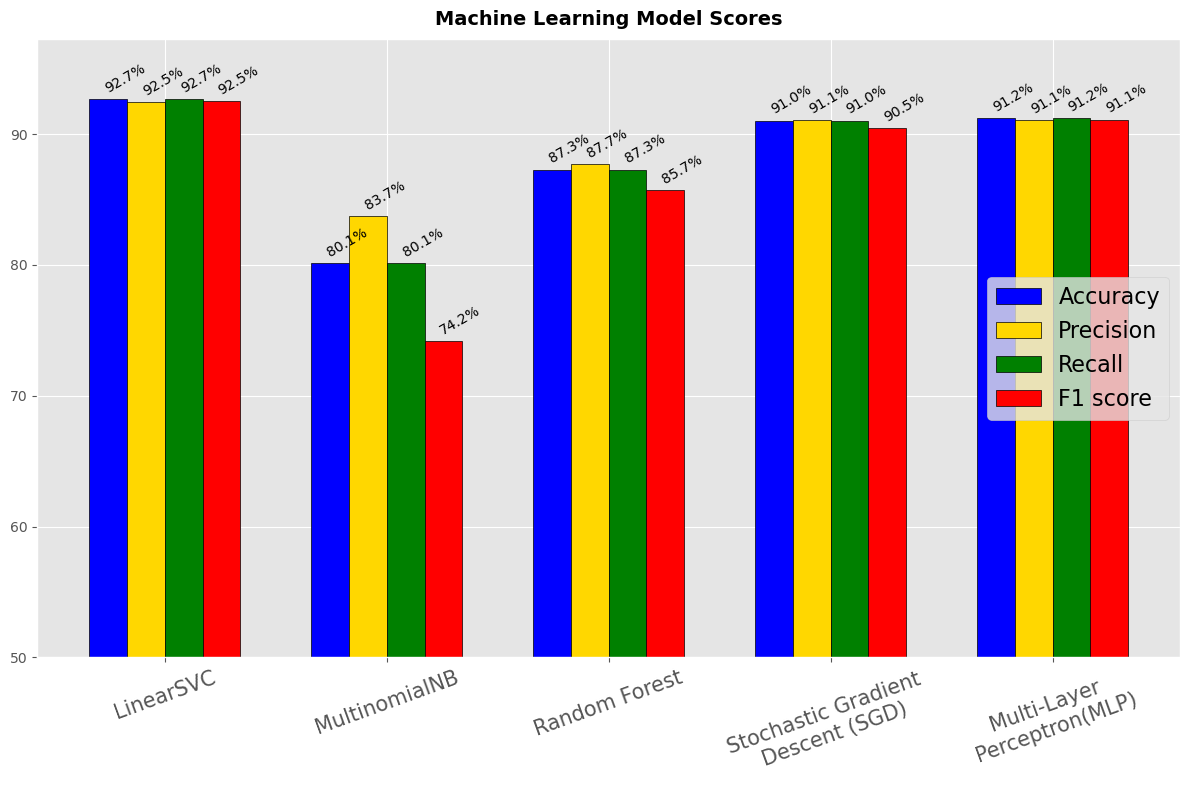

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# define data
models = ['LinearSVC', 'MultinomialNB', 'Random Forest', 'Stochastic Gradient \nDescent (SGD)', 'Multi-Layer \nPerceptron(MLP)']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 score']

data = [[0.9265, 0.9248, 0.9265, 0.9251],
        [0.8014, 0.8371, 0.8014, 0.7418],
        [0.8729, 0.8774, 0.8729, 0.8570],
        [0.9104, 0.9106, 0.9104, 0.9045],
        [0.9124, 0.9106, 0.9124, 0.9112]]

# multiply by 100 to get percentages
data = np.multiply(data, 100)

# set bar width
bar_width = 0.17

# set x position of bars
x_pos = np.arange(len(models))

# set color for each metric
colors = ['blue', 'gold', 'green', 'red']

# plot bars
fig, ax = plt.subplots(figsize=(12, 8))
for i in range(len(metrics)):
    ax.bar(x_pos + i*bar_width, data[:, i], bar_width, color=colors[i], label=metrics[i], edgecolor='black')
    
    # add percentage labels
    for j, v in enumerate(data[:, i]):
        ax.text(x_pos[j] + i*bar_width - 0.025, v + 0.5, f"{v:.1f}%", fontsize=10,rotation=30)

# set labels and tick marks
plt.xticks(x_pos + 1.5*bar_width, models, rotation=20,fontsize=15)
ax.set_ylim(50)
# plt.yticks(np.arange(0, 100, 10))
plt.title('Machine Learning Model Scores', fontweight='bold')
 
# Add legend
plt.legend(loc='center right', prop={'size': 16})

# increase spacing between bars and legend names
plt.subplots_adjust(top=1.8)
plt.tight_layout()
 
# Show plot
plt.show()


 - <div class="alert alert-block alert-warning">
<b>classification models:</b> Based on the results of the classification models, it can be observed that the LinearSVC model has the highest accuracy, precision, recall, and F1 score among all the models. This indicates that the LinearSVC model is the most effective in correctly predicting the target variable.
</div>

 - <div class="alert alert-block alert-warning">
<b>MultinomialNB model:</b> The MultinomialNB model has the lowest accuracy, precision, and F1 score among all the models, but has the highest recall score. This indicates that the MultinomialNB model has a higher tendency to identify positive cases correctly, but at the cost of incorrectly classifying some negative cases as positive.
</div>

 - <div class="alert alert-block alert-warning">
<b>Similarity :</b> The Random Forest, Stochastic Gradient Descent, and Multi-Layer Perceptron models have similar accuracy, precision, recall, and F1 scores, but the MLP model has slightly higher accuracy and F1 score.
</div>

 - <div class="alert alert-block alert-warning">
<b>Conclusion :</b> Overall, it can be concluded that the LinearSVC model is the best model for this dataset based on the evaluation metrics used in this analysis.
</div>

# TextCNN

In [158]:
from tensorflow.keras.preprocessing import sequence


maxlen = 50
X = list(sequence.pad_sequences(sport_business_politics_df.words, maxlen=maxlen))

# category to id

categories = sport_business_politics_df.groupby('category').size().index.tolist()
category_int = {}
int_category = {}
for i, k in enumerate(categories):
    category_int.update({k:i})
    int_category.update({i:k})

sport_business_politics_df['c2id'] = sport_business_politics_df['category'].apply(lambda x: category_int[x])



# glove embedding

In [160]:
word_index = tokenizer.word_index

EMBEDDING_DIM = 100

embeddings_index = {}
f = open('glove.6B.100d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s unique tokens.' % len(word_index))
print('Total %s word vectors.' % len(embeddings_index))

Found 120405 unique tokens.
Total 400000 word vectors.


In [162]:
from keras.initializers import Constant

embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

embedding_layer = Embedding(len(word_index)+1,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=maxlen,
                            trainable=False)


In [163]:
# prepared data 

X = np.array(X)
Y = np_utils.to_categorical(list(sport_business_politics_df.c2id))

# and split to training set and validation set

seed = 29
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=seed)

In [168]:
from keras.layers import Dense, Input, LSTM, Bidirectional, Activation, Conv1D, GRU, TimeDistributed
from keras.layers import GlobalAveragePooling1D, BatchNormalization, concatenate
from keras.layers import Reshape, Concatenate, Lambda, Average
from keras.models import Sequential, Model, load_model

inp = Input(shape=(maxlen,), dtype='int32')
embedding = embedding_layer(inp)
stacks = []
for kernel_size in [2, 3, 4]:
    conv = Conv1D(64, kernel_size, padding='same', activation='relu', strides=1)(embedding)
    pool = MaxPooling1D(pool_size=3)(conv)
    drop = Dropout(0.5)(pool)
    stacks.append(drop)

merged = Concatenate()(stacks)
flatten = Flatten()(merged)
drop = Dropout(0.5)(flatten)
outp = Dense(len(int_category), activation='softmax')(drop)

TextCNN = Model(inputs=inp, outputs=outp)
TextCNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

TextCNN.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 50)]         0           []                               
                                                                                                  
 embedding_6 (Embedding)        (None, 50, 100)      12040600    ['input_3[0][0]']                
                                                                                                  
 conv1d_23 (Conv1D)             (None, 50, 64)       12864       ['embedding_6[2][0]']            
                                                                                                  
 conv1d_24 (Conv1D)             (None, 50, 64)       19264       ['embedding_6[2][0]']            
                                                                                              

In [169]:
textcnn_history = TextCNN.fit(x_train, 
                              y_train, 
                              batch_size=128, 
                              epochs=20, 
                              validation_data=(x_val, y_val))

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
290/291 [============================>.] - ETA: 0s - loss: 0.4372 - accuracy: 0.8381WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001A2756C0280> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, se

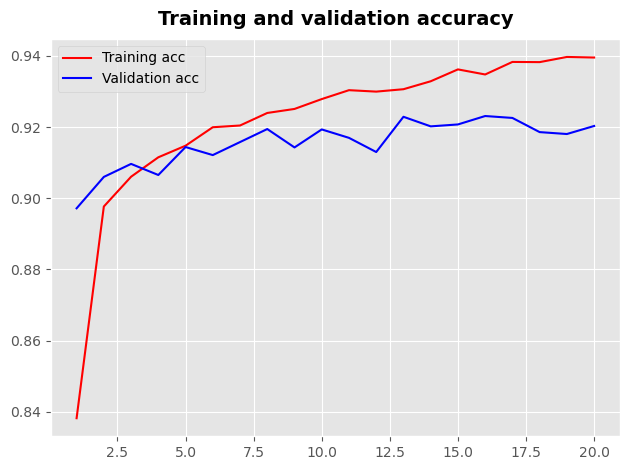

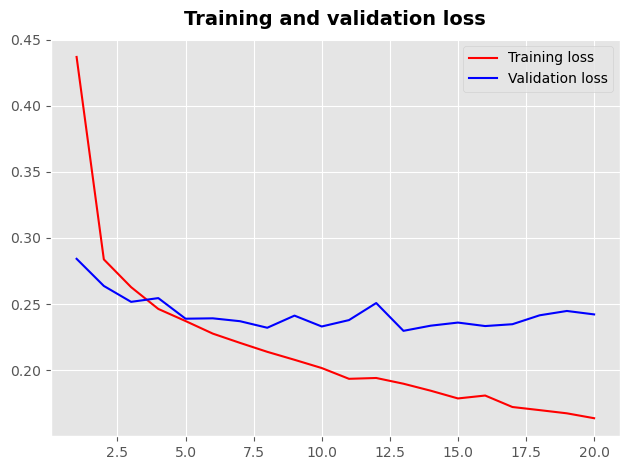

In [172]:
acc = textcnn_history.history['accuracy']
val_acc = textcnn_history.history['val_accuracy']
loss = textcnn_history.history['loss']
val_loss = textcnn_history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.legend()

plt.show()

Thank you